In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf

2024-07-10 19:26:01.353718: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-10 19:26:02.696246: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Found 269 files belonging to 2 classes.
Using 243 files for training.
Found 269 files belonging to 2 classes.
Using 26 files for validation.


2024-07-10 19:26:04.832161: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-07-10 19:26:05.091509: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


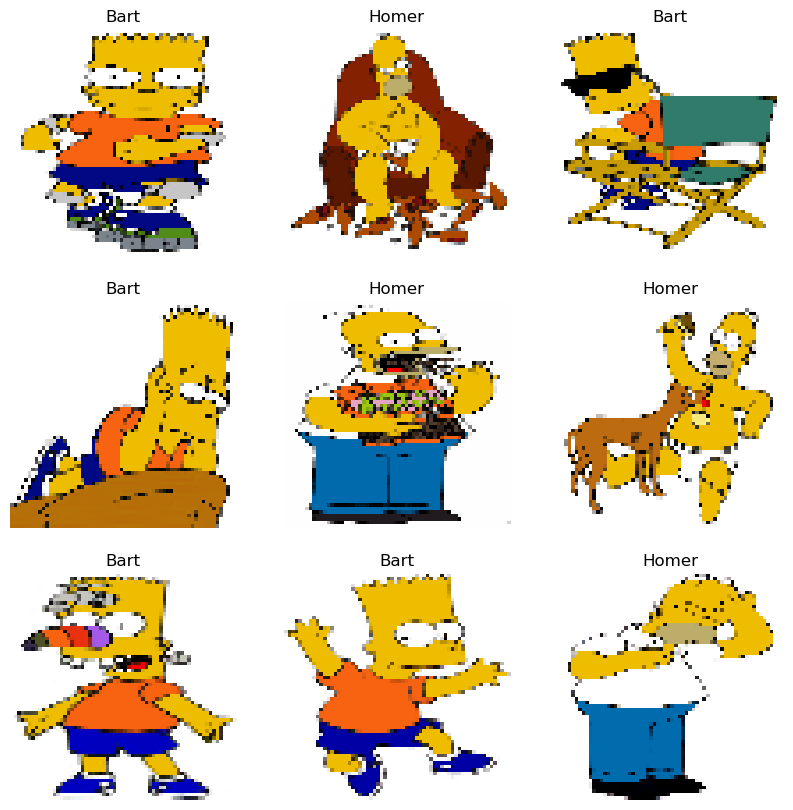

In [2]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
	'homer_bart',
	labels='inferred',
	label_mode='int',
	color_mode='rgb',
	class_names=['Homer', 'Bart'],
	validation_split=0.1,
	subset='training',
	seed=42,
	shuffle=True,
	image_size=(64, 64),
	batch_size=32,
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
	'homer_bart',
	labels='inferred',
	label_mode='int',
	color_mode='rgb',
	class_names=['Homer', 'Bart'],
	validation_split=0.1,
	subset='validation',
	seed=42,
	shuffle=True,
	image_size=(64, 64),
	batch_size=32,
)

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
	for i in range(9):
		ax = plt.subplot(3, 3, i+1)
		plt.imshow(images[i].numpy().astype("uint8"))
		plt.title('Homer' if labels[i] == 0 else 'Bart')
		plt.axis("off")
plt.show()

In [3]:
tf.keras.utils.set_random_seed(42)

model = tf.keras.Sequential([
	tf.keras.layers.Flatten(input_shape=(64, 64, 3)),
	tf.keras.layers.Dense(512, activation='relu'),
	tf.keras.layers.Dense(256, activation='relu'),
	tf.keras.layers.Dense(128, activation='relu'),
	tf.keras.layers.Dense(64, activation='relu'),
	tf.keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(optimizer='adam',
	loss='binary_crossentropy',
	metrics=['accuracy'])

history = model.fit(
	train_ds,
	validation_data=test_ds,
	epochs=30
)

Epoch 1/30


/home/avinashc/.local/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - accuracy: 0.5262 - loss: 553.8954 - val_accuracy: 0.6154 - val_loss: 962.7429
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.5499 - loss: 725.4103 - val_accuracy: 0.3846 - val_loss: 992.7886
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.4861 - loss: 759.6298 - val_accuracy: 0.3846 - val_loss: 748.1350
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.4485 - loss: 551.2341 - val_accuracy: 0.3846 - val_loss: 385.7420
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.4956 - loss: 247.1389 - val_accuracy: 0.4615 - val_loss: 100.8916
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.5995 - loss: 69.4677 - val_accuracy: 0.8077 - val_loss: 15.6913
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.7128 - loss: 31.0484 - val_accuracy: 0.7308 - val_loss: 24.1264
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.7388 - loss: 34.1846 - val_accuracy: 0.6923 - val

In [4]:
model.evaluate(test_ds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9615 - loss: 0.3455


[0.34546545147895813, 0.9615384340286255]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


2024-07-10 19:26:24.303718: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


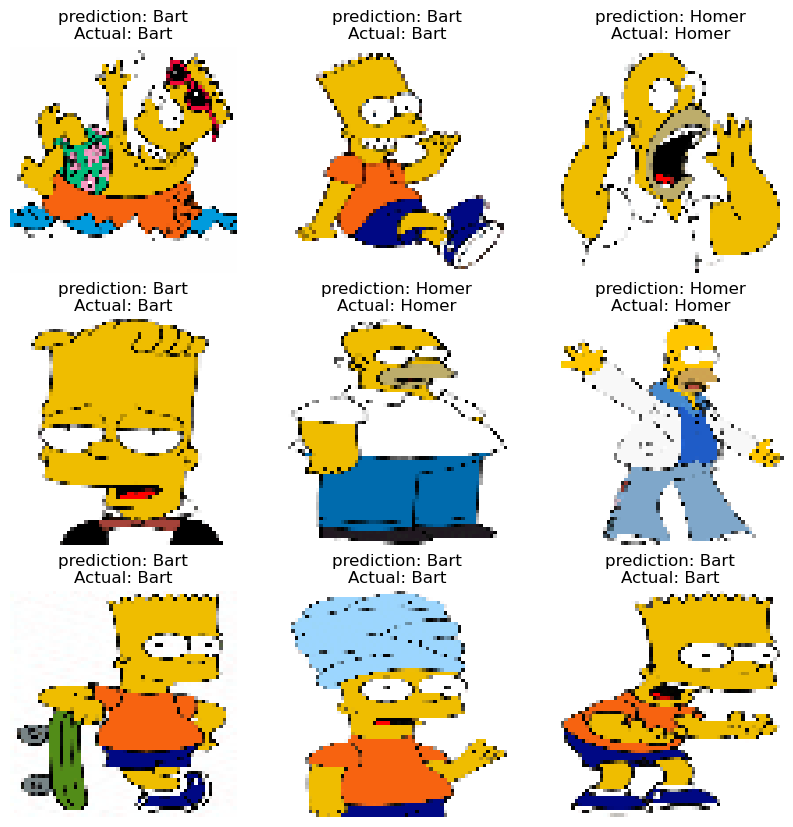

In [5]:
fig = plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
	for i in range(9):
		ax = plt.subplot(3, 3, i+1)
		plt.imshow(images[i].numpy().astype("int"))
		pred = model.predict(images[i].numpy().reshape(1, 64, 64, 3)).squeeze()
		pred = 'Homer' if pred <= 0.5 else 'Bart'
		plt.title('prediction: ' + pred + '\nActual: ' + ('Homer' if labels[i] == 0 else 'Bart'))
		plt.axis("off")
plt.show()